# Testing HadUK-Grid data 

Below is a quick script to read in and plot some HadUK-Grid data (it is for daily maximum temperature for August 2019). 

Try running this yourself, understaning what the data and code are doing, and then try adjusting various things. E.g. zooming in on different regions, plot

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.image as mpimg

In [2]:
ds = xr.open_dataset('/Users/lucy-paigewillows/Documents/Documents – Lucy-Paige’s MacBook Air/Final Project /tasmax_hadukgrid_uk_12km_day_20190801-20190831.nc')

In [3]:
print(ds)

<xarray.Dataset>
Dimensions:                       (bnds: 2, projection_x_coordinate: 82, projection_y_coordinate: 112, time: 31)
Coordinates:
  * time                          (time) datetime64[ns] 2019-08-01T12:00:00 ....
  * projection_y_coordinate       (projection_y_coordinate) float64 -1.02e+05...
  * projection_x_coordinate       (projection_x_coordinate) float64 -2.1e+05 ...
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 ...
Dimensions without coordinates: bnds
Data variables:
    tasmax                        (time, projection_y_coordinate, projection_x_coordinate) float64 ...
    transverse_mercator           int32 ...
    time_bnds                     (time, bnds) datetime64[ns] ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 ..

/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


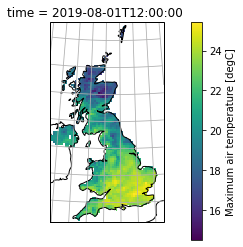

In [4]:
plt.figure()
ax = plt.axes(projection=ccrs.OSGB())
ds.tasmax[0,:].plot.imshow(ax=ax)
ax.coastlines(resolution='50m')
ax.gridlines()

In [5]:
ds
#bolded ones match dimensions

<xarray.Dataset>
Dimensions:                       (bnds: 2, projection_x_coordinate: 82, projection_y_coordinate: 112, time: 31)
Coordinates:
  * time                          (time) datetime64[ns] 2019-08-01T12:00:00 ....
  * projection_y_coordinate       (projection_y_coordinate) float64 -1.02e+05...
  * projection_x_coordinate       (projection_x_coordinate) float64 -2.1e+05 ...
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 ...
Dimensions without coordinates: bnds
Data variables:
    tasmax                        (time, projection_y_coordinate, projection_x_coordinate) float64 ...
    transverse_mercator           int32 ...
    time_bnds                     (time, bnds) datetime64[ns] ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 ...
Attributes:
    comment:        Daily resolution gridded climate observations
    creation_date:  2020-08-07T14:54:03
    frequency:      day
    institution:    Met Office
    references:     doi: 10.1002/joc.1161
    short_name:     daily_maxtemp
    source:         HadUK-Grid_v1.0.2.1
    title:          Gridded surface climate observations data for the UK
    version:        v20200731
    Conventions:    CF-1.5

In [6]:
#ds.isel

In [7]:
ds.data_vars 

Data variables:
    tasmax                        (time, projection_y_coordinate, projection_x_coordinate) float64 ...
    transverse_mercator           int32 -2147483647
    time_bnds                     (time, bnds) datetime64[ns] 2019-08-01 ... ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 -1....
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 -2....

In [8]:
for varname in ds:
    print(varname)

tasmax
transverse_mercator
time_bnds
projection_y_coordinate_bnds
projection_x_coordinate_bnds


In [9]:
for coordinates in ds:
    print(coordinates)

tasmax
transverse_mercator
time_bnds
projection_y_coordinate_bnds
projection_x_coordinate_bnds


In [10]:
print(ds.coords)

Coordinates:
  * time                     (time) datetime64[ns] 2019-08-01T12:00:00 ... 20...
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...


In [11]:
tasmax=ds.tasmax
transverse_mercator= ds.transverse_mercator
time_bnds= ds.time_bnds
projection_y_coordinate_bnds= ds.projection_y_coordinate_bnds
projection_x_coordinate_bnds=ds.projection_x_coordinate_bnds
projection_y_coordinate=ds.projection_y_coordinate
projection_x_coordinate=ds.projection_x_coordinate


In [12]:
tasmax.shape

(31, 112, 82)

Therefore the transverse_mercator is dimensionless, projections and time have the same dimensions, and tasmax has more dimensions 

In [13]:
tasmax[0,:]

<xarray.DataArray 'tasmax' (projection_y_coordinate: 112, projection_x_coordinate: 82)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time                     datetime64[ns] 2019-08-01T12:00:00
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Maximum air temperature
    units:          degC
    description:    Maximum air temperature
    label_units:    C
    level:          1.5m
    plot_label:     Maximum air temperature at 1.5m (C)
    cell_methods:   time: maximum (comment: observing period is 0900 on day D...
    grid_mapping:   transverse_mercator

I have selected the first time index, therefore there is no longer a time dimension so i t is no longer in bold. time only has one values which is the value at the first time index 

In [14]:
tasmax.isel(time=0)

<xarray.DataArray 'tasmax' (projection_y_coordinate: 112, projection_x_coordinate: 82)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time                     datetime64[ns] 2019-08-01T12:00:00
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Maximum air temperature
    units:          degC
    description:    Maximum air temperature
    label_units:    C
    level:          1.5m
    plot_label:     Maximum air temperature at 1.5m (C)
    cell_methods:   time: maximum (comment: observing period is 0900 on day D...
    grid_mapping:   transverse_mercator

In [15]:
tasmax.sel(projection_x_coordinate=slice(20,160), projection_y_coordinate=slice(-80,25))

<xarray.DataArray 'tasmax' (time: 31, projection_y_coordinate: 0, projection_x_coordinate: 0)>
array([], shape=(31, 0, 0), dtype=float64)
Coordinates:
  * time                     (time) datetime64[ns] 2019-08-01T12:00:00 ... 20...
  * projection_y_coordinate  (projection_y_coordinate) float64 
  * projection_x_coordinate  (projection_x_coordinate) float64 
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Maximum air temperature
    units:          degC
    description:    Maximum air temperature
    label_units:    C
    level:          1.5m
    plot_label:     Maximum air temperature at 1.5m (C)
    cell_methods:   time: maximum (comment: observing period is 0900 on day D...
    grid_mapping:   transverse_mercator

In [16]:
tasmax.sel(time=slice('2019-08-31T12:00:00'))

<xarray.DataArray 'tasmax' (time: 31, projection_y_coordinate: 112, projection_x_coordinate: 82)>
[284704 values with dtype=float64]
Coordinates:
  * time                     (time) datetime64[ns] 2019-08-01T12:00:00 ... 20...
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Maximum air temperature
    units:          degC
    description:    Maximum air temperature
    label_units:    C
    level:          1.5m
    plot_label:     Maximum air temperature at 1.5m (C)
    cell_methods:   time: maximum (comment: observing period is 0900 on day D...
    grid_mapping:   transverse_mercator

Plotted the first day of the month and then the last (1st of august and then the 31st) 

/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


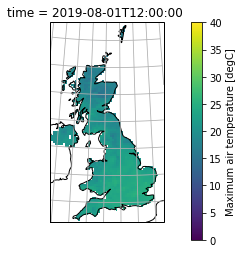

In [17]:
plt.figure()
ax = plt.axes(projection=ccrs.OSGB())
im=ds.tasmax[0].plot.imshow(ax=ax)
im.set_clim(0,40)
ax.coastlines(resolution='50m')
ax.gridlines()

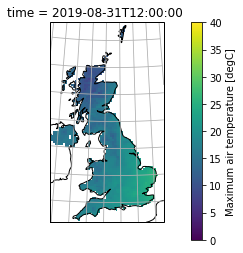

In [18]:
plt.figure()
ax = plt.axes(projection=ccrs.OSGB())
im=ds.tasmax[30].plot.imshow(ax=ax)
im.set_clim(0,40)
ax.coastlines(resolution='50m')
ax.gridlines()

In [19]:
tasmax_clim=tasmax.sel(time=slice('2019-08-01T00:00:00','2019-08-31T23:59:59')).mean(dim='time')

/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


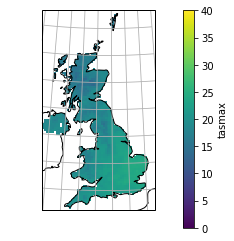

In [20]:
plt.figure()
ax = plt.axes(projection=ccrs.OSGB())
im=tasmax_clim.plot.imshow(ax=ax)
im.set_clim(0,40)
ax.coastlines(resolution='50m')
ax.gridlines()

Plotted the average temperature for the month 

In [21]:
tasmax_max=tasmax.sel(time=slice('2019-08-01T00:00:00','2019-08-31T23:59:59')).max(dim='time')

/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


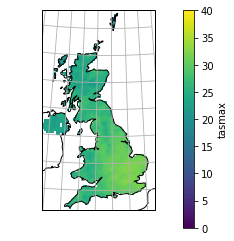

In [22]:
plt.figure()
ax = plt.axes(projection=ccrs.OSGB())
im=tasmax_max.plot.imshow(ax=ax)
im.set_clim(0,40)
ax.coastlines(resolution='50m')
ax.gridlines()

Plotted the maximum temperature 

In [23]:
tasmax_min=tasmax.sel(time=slice('2019-08-01T00:00:00','2019-08-31T23:59:59')).min(dim='time')

/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


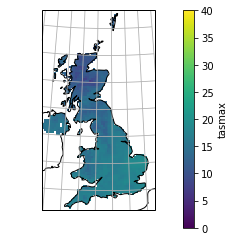

In [24]:
plt.figure()
ax=plt.axes(projection=ccrs.OSGB())
im= tasmax_min.plot.imshow()
im.set_clim(0,40)
ax.coastlines(resolution='50m')
ax.gridlines()

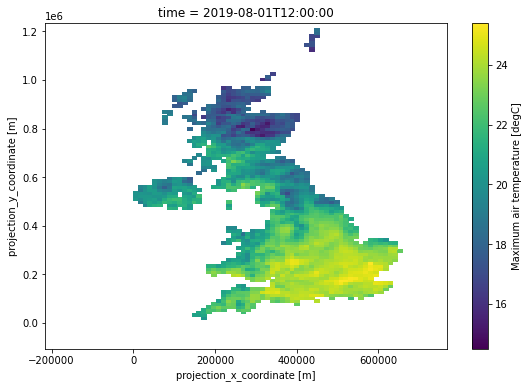

In [25]:
tasmax.isel(time=0).plot(size=6)

In [26]:
max(projection_x_coordinate.values)

762000.0

In [27]:
min(projection_x_coordinate.values)

-210000.0

In [28]:
max(projection_y_coordinate.values)

1230000.0

In [29]:
min(projection_y_coordinate.values)

-102000.0

In [31]:
projection_x_coordinate.shape

(82,)

In [32]:
projection_y_coordinate.shape

(112,)

In [33]:
tasmax.shape

(31, 112, 82)

In [34]:
print(latitude)

NameError: name 'latitude' is not defined

In [35]:
latitude.shape

NameError: name 'latitude' is not defined

In [36]:
longitude.shape

NameError: name 'longitude' is not defined

In [37]:
print(tasmax.sel(latitude=slice(0,112), projection_y_coordinate=slice(0,82)))

ValueError: dimensions or multi-index levels ['latitude'] do not exist

In [38]:
tasmax.sel(time=slice('2019-08-01T00:00:00','2019-08-02T00:00:00'), longitude=slice(20,160), latitude=slice(-80,25))

ValueError: dimensions or multi-index levels ['longitude', 'latitude'] do not exist